## Import Library yang ingin Digunakan

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.cluster import KMeans

## Read Dataset

In [2]:
read = pd.read_csv ('Mall_Customers.csv')
read.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## Persiapan Dataset

In [3]:
read.rename (index=str, columns={
    'Annual Income (k$)' : 'Income',
    'Spending Score (1-100)' : 'Score'
}, inplace=True)

## Drop Kolom yang tidak Dipakai

In [4]:
X = read.drop (['CustomerID','Gender'], axis=1)
X

,Age,Income,Score
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


## Menentukan Jumlah Cluster denga Elbow

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.1

Text(5, 150000, 'Possible Elbow Point')

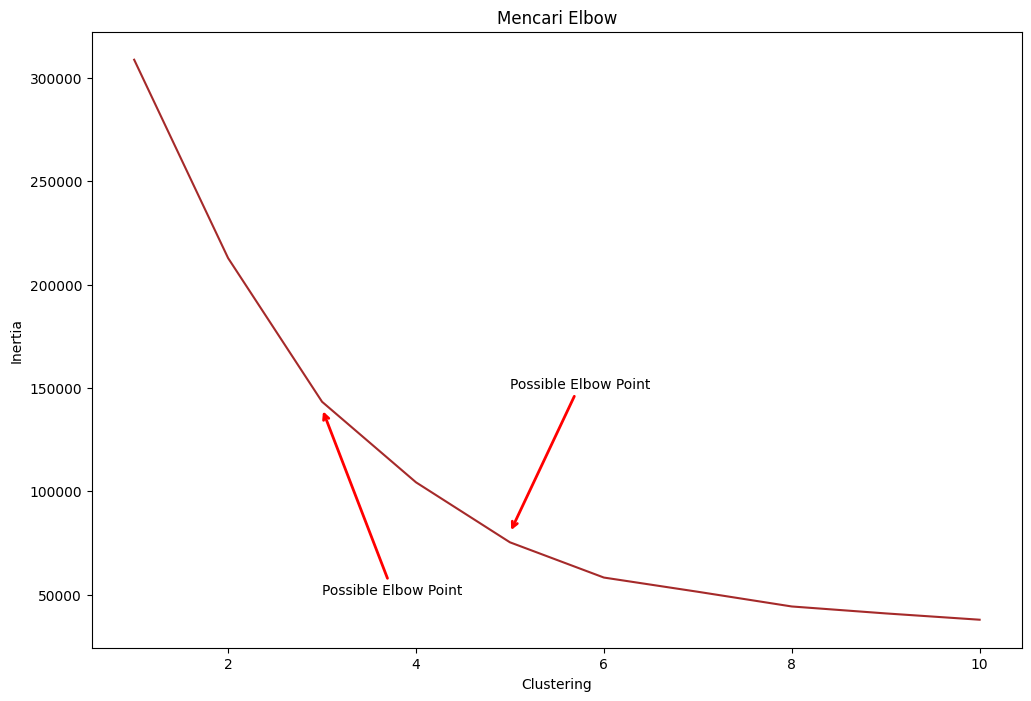

In [5]:
clustering = []
for i in range (1,11) :
    km = KMeans (n_clusters=i).fit (X)
    clustering.append (km.inertia_)
    
fig, ax = plt.subplots (figsize = (12,8))
sns.lineplot (x=list(range(1,11)), y=clustering, ax=ax, color='brown')
ax.set_title ('Mencari Elbow')
ax.set_xlabel ('Clustering')
ax.set_ylabel ('Inertia')

# Menambahkan panah Elbow
ax.annotate ('Possible Elbow Point', xy=(3,140000), xytext=(3,50000), xycoords='data',
             arrowprops = dict(arrowstyle='->', connectionstyle='arc3', color='red', lw=2))

ax.annotate ('Possible Elbow Point', xy=(5,80000), xytext=(5,150000), xycoords='data',
             arrowprops = dict(arrowstyle='->', connectionstyle='arc3', color='red', lw=2))

## Proses Clustering

In [6]:
n_clustering = 4 
kmean = KMeans (n_clusters=n_clustering).fit(X)
X ['Labels'] = kmean.labels_

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


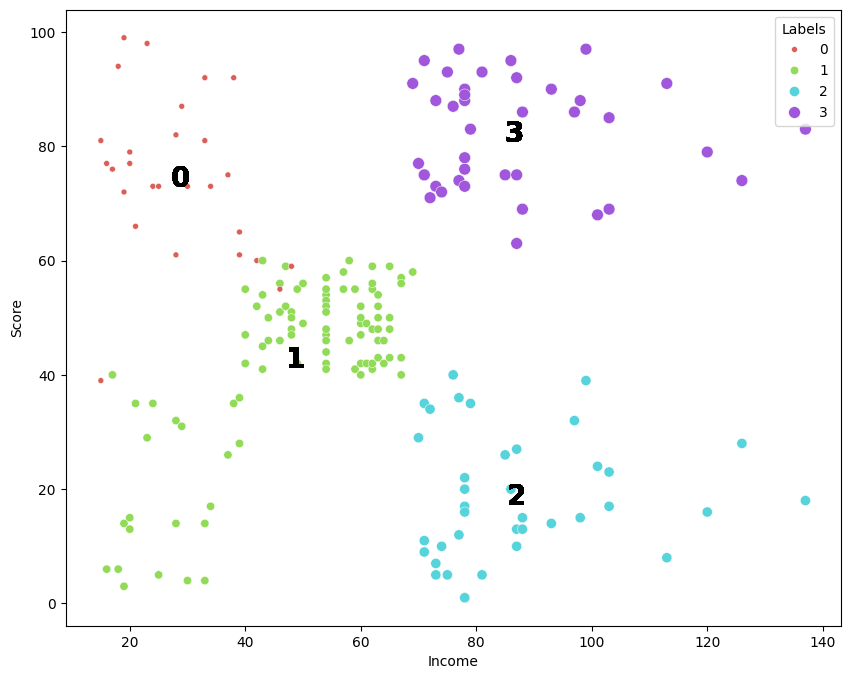

In [7]:
plt.figure(figsize=(10, 8))

# Pastikan 'Income', 'Score', dan 'Labels' ada dalam DataFrame X
sns.scatterplot(x=X['Income'], y=X['Score'], hue=X['Labels'], markers=True, 
                size=X['Labels'], palette=sns.color_palette('hls', n_clustering))

for label in X['Labels']:
    plt.annotate(label,
                 (X[X['Labels']==label]['Income'].mean(),
                  X[X['Labels']==label]['Score'].mean()),
                  horizontalalignment = 'center',
                  verticalalignment = 'center',
                  size = 20, weight='bold',
                  color = 'black')

plt.show()